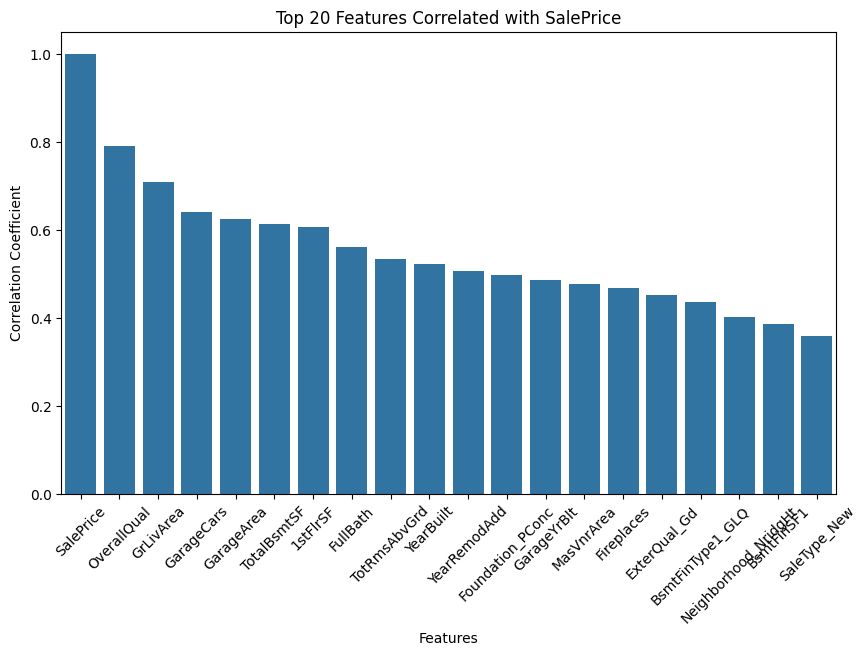

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
Foundation_PConc        0.497734
GarageYrBlt             0.486362
MasVnrArea              0.477493
Fireplaces              0.466929
ExterQual_Gd            0.452466
BsmtFinType1_GLQ        0.434597
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
SaleType_New            0.357509
Name: SalePrice, dtype: float64


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_data = pd.read_csv('train.csv')

# Display the first few rows of the training data
train_data.head()

# Data Preprocessing: Handle missing values and convert categorical variables
train_data.fillna({
    'LotFrontage': train_data['LotFrontage'].mean(),
    'Alley': 'No Alley',
    'BsmtQual': 'No Basement',
    'GarageType': 'No Garage',
    'PoolQC': 'No Pool',
    'FirePlaceQu': 'No Fireplace',
    'Fence': 'No Fence',
}, inplace=True)

# Convert categorical variables to numerical (one-hot encoding)
train_data = pd.get_dummies(train_data, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Get the correlation of all features with SalePrice
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Visualize the top features correlated with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_saleprice.head(20).index, y=correlation_with_saleprice.head(20).values)
plt.title('Top 20 Features Correlated with SalePrice')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

# Display the correlation values
print(correlation_with_saleprice.head(20))